In [115]:
import xarray as xr
import os
import rioxarray
from rioxarray.merge import merge_arrays
NDWI = '''..\\data\\NDWI256\\data'''
LAKE = "lake_mead_4"

In [116]:
start_features = []
end_features = []
mask = []
PATH = os.path.join(NDWI,LAKE)
for dir in os.listdir((os.path.join(PATH,"tiles"))):
    if os.path.isdir(os.path.join(PATH,"tiles",dir)):
        temp_start_features = xr.open_dataarray(os.path.join(PATH,"tiles",dir,"features.nc"),decode_coords="all")[0]
        temp_end_features = xr.open_dataarray(os.path.join(PATH,"tiles",dir,"features.nc"),decode_coords="all")[3]
        temp_mask= xr.open_dataset (os.path.join(PATH,"tiles",dir,"mask.nc"),decode_coords="all")["water_change"]
        temp_start_features.rio.write_crs(4326, inplace=True)
        temp_mask.rio.write_crs(4326, inplace=True)
        temp_end_features.rio.write_crs(4326, inplace=True)
        start_features.append(temp_start_features)
        mask.append(temp_mask)
        end_features.append(temp_end_features)
print("Merging data ...")
start_features = merge_arrays(start_features)
end_features = merge_arrays(end_features)
print("Merging mask ...")
mask = merge_arrays(mask)

Merging data ...
Merging mask ...


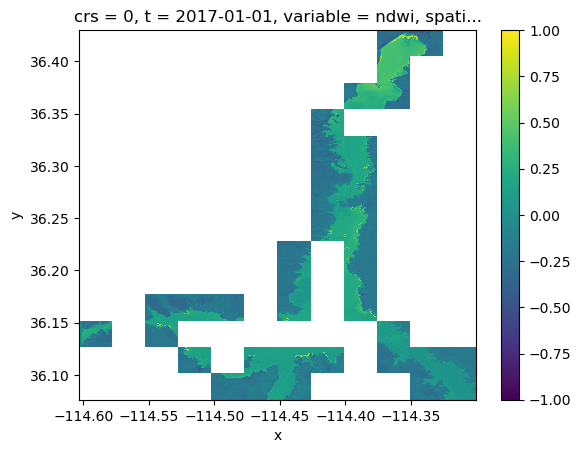

In [117]:
start_features.plot.imshow(vmax=1,vmin=-1)

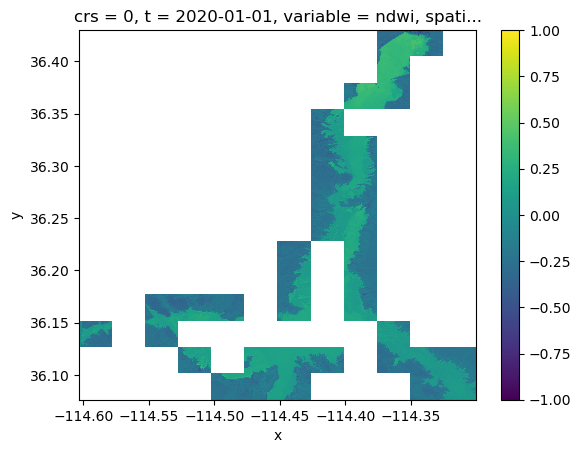

In [118]:
end_features.plot.imshow(vmax=1,vmin=-1)

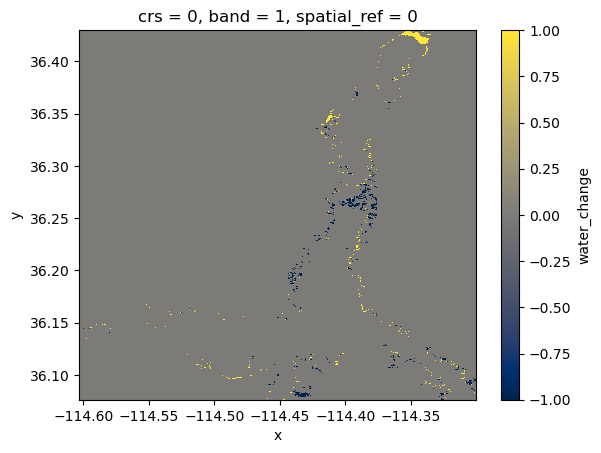

In [119]:
mask.plot.imshow(vmax=1,vmin=-1, cmap="cividis")

In [120]:
difference = end_features - start_features

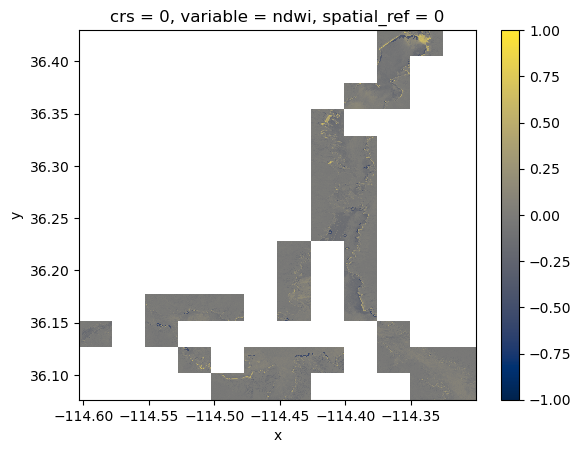

In [121]:
difference.plot.imshow(vmax=1,vmin=-1, cmap="cividis")

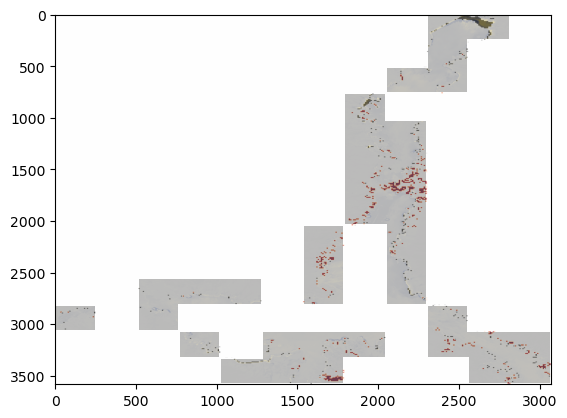

In [122]:
import matplotlib.pyplot as plt
plt.imshow(difference.values, cmap="cividis",aspect="auto",vmin=-1,vmax=1)
plt.imshow(mask.values, cmap="RdGy", alpha=0.5, aspect="auto")
plt.show()

In [123]:
water_start = xr.where(start_features > 0.0,1,0)
water_end = xr.where(end_features > 0.0,1,0)
water_change = water_end - water_start

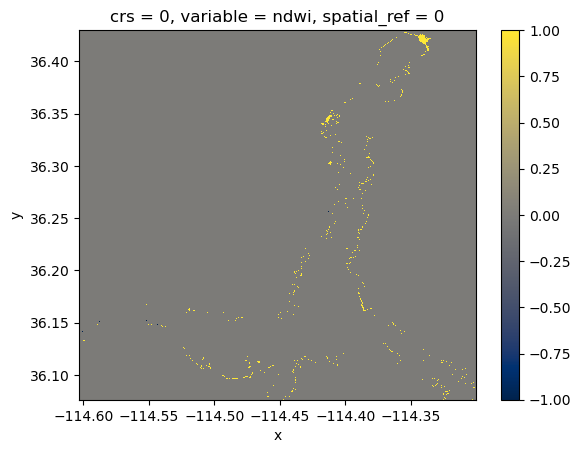

In [124]:
water_change.plot.imshow(vmax=1,vmin=-1, cmap="cividis")